**Water Source Segmentation using Convolutional Encoder Decoder Model**

Importing Modules

In [ ]:
import gdal
import matplotlib.pyplot as plt
import tifffile
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input, BatchNormalization, Conv2D, UpSampling2D, concatenate
from keras.layers import MaxPooling2D
from keras.models import Model
from tensorflow.keras.backend import pool2d
from keras import backend as K
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

Extract the Dataset

In [ ]:
""" Mount Drive """
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Load Data

In [ ]:
""" Loading Input Images """

n_images = 1080  # Number of images in dataset
image_height = 128 # Height of image
image_width = 128 # Width of image
n_channel = 3 # Number of channels of image
path = "/content/drive/My Drive/Sentinel 2 data/WaterWays/WaterWays_FCC" # Path of data

_data_FCC = np.full((n_images,n_channel,image_height,image_width),0)

for i in range(0,n_images):
  image_path = path + "/{}.tif".format(i)
  raster_ds = gdal.Open(image_path, gdal.GA_ReadOnly)  # Reading Image
  for j in range(1,n_channel+1):
    _data_FCC[i][j-1] = raster_ds.GetRasterBand(j).ReadAsArray()  # Reading Bands of Image
  clear_output(wait=True)
  print("Loading FCC images : ",round((i/1079)*100,3),"%")
_data_FCC=np.swapaxes(_data_FCC,1,3)

Loading FCC images :  100.0 %


In [ ]:
""" Loading Ground Truth Images """

n_images = 1080  # Number of images in dataset
image_height = 128 # Height of image
image_width = 128 # Width of image
n_channel = 1 # Number of channels of image
path = "/content/drive/My Drive/Sentinel 2 data/WaterWays/WaterWays_GT" # Path of data

_data_GT = np.full((n_images,n_channel,image_height,image_width),0)

for i in range(0,n_images):
  image_path = path + "/{}.tif".format(i)
  raster_ds = gdal.Open(image_path, gdal.GA_ReadOnly)  # Reading Image
  for j in range(1,n_channel+1):
    _data_GT[i][j-1] = raster_ds.GetRasterBand(j).ReadAsArray()  # Reading Bands of Image
  clear_output(wait=True)
  print("Loading GT images : ",round((i/1079)*100,3),"%")
_data_GT=np.swapaxes(_data_GT,1,3)

Loading GT images :  100.0 %


Visualizing Data

In [ ]:
print("Input Data Shape : ",_data_FCC.shape) # Shape of Input Data
print("Ground Truth Data Shape : ",_data_GT.shape) # Shape of Ground Truth Data

Input Data Shape :  (1080, 128, 128, 3)
Ground Truth Data Shape :  (1080, 128, 128, 1)


((128, 128),
 <matplotlib.image.AxesImage at 0x7ff2e2f73588>)

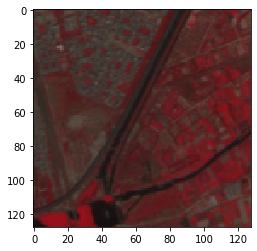

In [ ]:
n_image = 683  # Image Number

#Input Image
tifffile.imshow(_data_FCC[n_image],figure=(128,128))

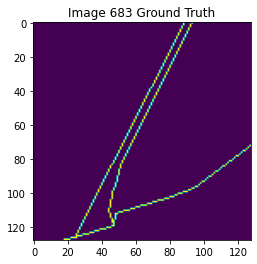

In [ ]:
n_image = 683  # Image Number

# Grount Truth
image_2 = _data_GT[n_image][:,:,0]
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff2e14104e0>)

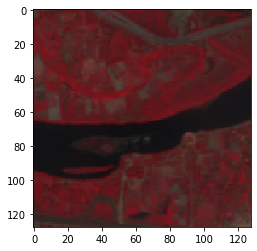

In [ ]:
n_image = 415  # Image Number

#Input Image
tifffile.imshow(_data_FCC[n_image],figure=(128,128))

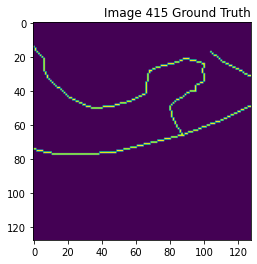

In [ ]:
n_image = 415  # Image Number

# Grount Truth
image_2 = _data_GT[n_image][:,:,0]
plt.title("Image {} Ground Truth".format(n_image),loc="center")
plt.imshow(image_2)

Augmentating Data

In [ ]:
""" Augmenting Input Data """

n_images = 1080  # Number of images in dataset
image_height = 128 # Height of image
image_width = 128 # Width of image
n_channel = 3 # Number of channel of image

data_FCC_augment = np.full((n_images,image_height,image_width,n_channel),0)

for i in range(0,n_images):
  for j in range(0,n_channel):
    data_FCC_augment[i][:,:,j] = np.transpose(_data_FCC[i][:,:,j])

  clear_output(wait=True)
  print("Augmenting FCC images : ",round((i/1079)*100,3),"%")

Augmenting FCC images :  100.0 %


In [ ]:
""" Augmenting Ground Truth Data """

n_images = 1080  # Number of images in dataset
image_height = 128 # Height of image
image_width = 128 # Width of image
n_channel = 1 # Number of channel of image

data_GT_augment = np.full((n_images,image_height,image_width,n_channel),0)

for i in range(0,n_images):
  for j in range(0,n_channel):
    data_GT_augment[i][:,:,j] = np.transpose(_data_GT[i][:,:,j])

  clear_output(wait=True)
  print("Augmenting GT images : ",round((i/1079)*100,3),"%")

Augmenting GT images :  100.0 %


Visualizing Augmented Data

In [ ]:
print("Augmented Input Data Shape : ",data_FCC_augment.shape) # Shape of Augmented Input Data
print("Augmented Ground Truth Data Shape : ",data_GT_augment.shape) # Shape of Augmented Ground Truth Data

Augmented Input Data Shape :  (1080, 128, 128, 3)
Augmented Ground Truth Data Shape :  (1080, 128, 128, 1)


((128, 128),
 <matplotlib.image.AxesImage at 0x7ff2e11ea160>)

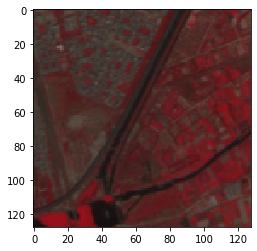

In [ ]:
""" Visualizing Input Image """

n_image = 683  # Image Number

# Original Image
tifffile.imshow(_data_FCC[n_image],figure=(128,128))

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff2e11bec88>)

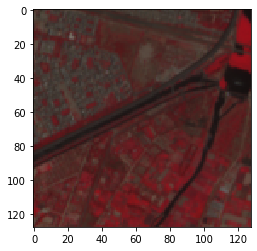

In [ ]:
""" Visualizing Input Image """

n_image = 683  # Image Number

# Augmented Image
tifffile.imshow(data_FCC_augment[n_image],figure=(128,128))

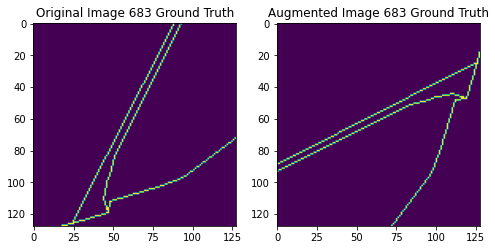

In [ ]:
""" Visualizing Ground Truth """

n_image = 683  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Original Input Ground Truth
image_1 = _data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Original Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_1)

# Augmented Input Ground Truth
image_2 = data_GT_augment[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Augmented Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)
    
plt.show()

Concatenate data

In [ ]:
""" Concatenating Input images and Augmented Input images """
data_FCC = np.concatenate((_data_FCC,data_FCC_augment),axis = 0)

In [ ]:
""" Concatenating Ground Truth and Augmented Ground Truth """
data_GT = np.concatenate((_data_GT,data_GT_augment),axis = 0)

In [ ]:
print("Input data shape : ",data_FCC.shape)  # Final Input data shape
print("Ground Truth data shape : ",data_GT.shape)  # Final Ground Truth data shape

Input data shape :  (2160, 128, 128, 3)
Ground Truth data shape :  (2160, 128, 128, 1)


Dividing Data in Train,Test and Validation

In [ ]:
""" 10% Test, 90% Train """
FCC_Train,FCC_Test,GT_Train,GT_Test = train_test_split(data_FCC,
                                                             data_GT, 
                                                             test_size=0.1, 
                                                             random_state=0
                                                          )

In [ ]:
""" 10.8% Validation 79.2% Train """
FCC_Train,FCC_Validation,GT_Train,GT_Validation = train_test_split(FCC_Train,
                                                             GT_Train, 
                                                             test_size=0.12, 
                                                             random_state=0
                                                          )

In [ ]:
""" Visualize Division """
print("Train Data shape : ",FCC_Train.shape)
print("Validation Data shape : ",FCC_Validation.shape)
print("Test Data shape : ",FCC_Test.shape)

Train Data shape :  (1710, 128, 128, 3)
Validation Data shape :  (234, 128, 128, 3)
Test Data shape :  (216, 128, 128, 3)


Creating Model

In [ ]:
""" Min Pooling """

class MinPooling2D(layers.MaxPooling2D):


  def __init__(self, pool_size=(2, 2), strides=None, 
               padding='valid', data_format=None, **kwargs):
    super(MaxPooling2D, self).__init__(pool_size, strides, padding,
                                       data_format, **kwargs)

  def pooling_function(inputs, pool_size, strides, padding, data_format):
    return -K.pool2d(-inputs, pool_size, strides, padding, data_format,
                                                         pool_mode='max')

In [ ]:
""" Convolution Encoder Decoder Model """

image_height = 128 # Height of image
image_width = 128 # Width of image
n_channel = 3 # Number of channel of image
img_input = Input(shape=(image_height,image_width,n_channel)) # Input Shape

""" Encoder """
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
conv1 = BatchNormalization()(conv1)
pool1 = MinPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
conv2 = BatchNormalization()(conv2)
pool2 = MinPooling2D((2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
conv3 = BatchNormalization()(conv3)
pool3 = MinPooling2D((2, 2))(conv3)


conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool3)
conv4 = BatchNormalization()(conv4)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
conv4 = BatchNormalization()(conv4)

""" Decoder """
up1 = UpSampling2D((2, 2))(conv4) 
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1)
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
conv5 = BatchNormalization()(conv5)

up2 = UpSampling2D((2, 2))(conv5) 
conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
conv6 = BatchNormalization()(conv6)

up3 = UpSampling2D((2, 2))(conv6)
conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up3)
conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
conv7 = BatchNormalization()(conv7)

out = Conv2D(1, (1, 1) , activation='sigmoid', padding='same')(conv7)

""" Create Model """
model = Model(inputs=[img_input], outputs=[out])

In [ ]:
""" Summary of Model """
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
min_pooling2d_4 (MinPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 64)        3692

In [ ]:
""" Compile the Model """
model.compile(loss='binary_crossentropy',
        optimizer='Adam',
        metrics=['accuracy'])

In [ ]:
""" Load weights """
segnet_model = model.load_weights("SegNet_aug2")

In [ ]:
""" Fit the Model """
segnet_model = model.fit(FCC_Train, GT_Train,epochs=200,verbose=1,validation_data=(FCC_Validation, GT_Validation))

Train on 1710 samples, validate on 234 samples
Epoch 1/200
1710/1710 [==============================] - 24s 14ms/step - loss: 0.6067 - accuracy: 0.9075 - val_loss: 0.0689 - val_accuracy: 0.9898
Epoch 2/200
1710/1710 [==============================] - 14s 8ms/step - loss: 0.3850 - accuracy: 0.9964 - val_loss: 0.3086 - val_accuracy: 0.9972
Epoch 3/200
1710/1710 [==============================] - 14s 8ms/step - loss: 0.2125 - accuracy: 0.9969 - val_loss: 0.1553 - val_accuracy: 0.9975
Epoch 4/200
1710/1710 [==============================] - 14s 8ms/step - loss: 0.1163 - accuracy: 0.9970 - val_loss: 0.0856 - val_accuracy: 0.9975
Epoch 5/200
1710/1710 [==============================] - 14s 8ms/step - loss: 0.0712 - accuracy: 0.9970 - val_loss: 0.0547 - val_accuracy: 0.9975
Epoch 6/200
1710/1710 [==============================] - 14s 8ms/step - loss: 0.0494 - accuracy: 0.9970 - val_loss: 0.0417 - val_accuracy: 0.9975
Epoch 7/200
1710/1710 [==============================] - 14s 8ms/step - loss

In [ ]:
""" Save Weights """
model.save('SegNet_Final_Submision')

Predicting Output

In [ ]:
""" Predict Output on test data """
GT_predict = model.predict(data_FCC,verbose=1)

2160/2160 [==============================] - 6s 3ms/step


In [ ]:
""" Check shape of output """
print("Shape of Predicted Output : ",GT_predict.shape)

Shape of Predicted Output :  (2160, 128, 128, 1)


In [ ]:
""" Convert Predicted output in binary """

n_images = 2160  # Number of images in GT_predict
image_height = 128 # Height of image
image_width = 128 # Width of image
n_channel = 1 # Number of channel of image

GT_predict_bool = np.full((n_images,image_height,image_width,n_channel),0)

for i in range(0,n_images):
  for j in range(0,image_height):
    for k in range(0,image_width):
      if GT_predict[i][j][k][0]>0.2:
        GT_predict_bool[i][j][k] = 1
  clear_output(wait=True)
  print("Checking : ",round((i/(n_images-1))*100,3),"%")

Checking :  100.0 %


Evaluating Model

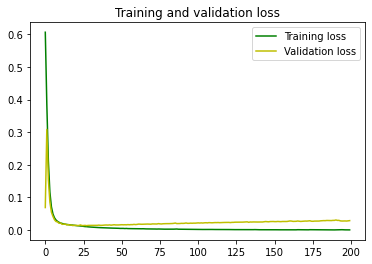

In [ ]:
""" Train Loss and Validation Loss Graph """
loss = segnet_model.history['loss']
val_loss = segnet_model.history['val_loss']
epochs = range(0,200)
plt.figure()
plt.plot(epochs, loss, 'g-', label='Training loss')
plt.plot(epochs, val_loss, 'y-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

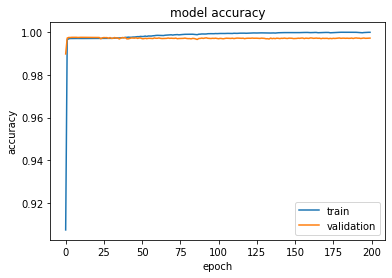

In [ ]:
""" Train Accuracy and Validation Accuracy Graph """
plt.plot(segnet_model.history['accuracy'])
plt.plot(segnet_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
""" Loss and Accuracy on Test Data """
model.evaluate(FCC_Test,GT_Test)

216/216 [==============================] - 1s 4ms/step


[0.034284939506539595, 0.9966250061988831]

In [ ]:
""" Accuracy, Precision, Recall and F1 Score on Validation and Test Data """

n_images = 2160  # Number of images 
image_height = 128 # Height of image
image_width = 128 # Width of image
start_index = 1710 # Start Index of Validation Data

"""
TP : True Positive
TN : True Negative
FP : False Positive
FN : False Negative

"""

TP = TN = FP = FN = 0
for k in range(start_index,n_images):
  for i in range(0,image_height):
    for j in range(0,image_width):
      if((GT_predict_bool[k][i][j][0] == data_GT[k][i][j][0]) and (data_GT[k][i][j][0] == 1)):
        TP = TP+1
      if((GT_predict_bool[k][i][j][0] == data_GT[k][i][j][0]) and (data_GT[k][i][j][0] == 0)):
        TN = TN+1
      if(GT_predict_bool[k][i][j][0] > data_GT[k][i][j][0]):
        FP = FP+1
      if(GT_predict_bool[k][i][j][0] < data_GT[k][i][j][0]):
        FN = FN+1
  clear_output(wait=True)
  print("Calculating : ",round(((k)/(n_images-1))*100,3),"%")
accuracy = ((TP+TN)/(TP+FP+TN+FN))*100
precision = (TP/(TP+FP))*100
recall = (TP/(TP+FN))*100
f1score = ((2*precision*recall)/(precision+recall))
print(accuracy,precision,recall,f1score)

Calculating :  100.0 %
99.95046657986111 90.94322223685943 85.84307386222333 88.31958037484807


In [ ]:
""" Accuracy, Precision, Recall and F1 Score on Test Data """

n_images = 2160  # Number of images 
image_height = 128 # Height of image
image_width = 128 # Width of image
start_index = 1944 # Start Index of Test Data

"""
TP : True Positive
TN : True Negative
FP : False Positive
FN : False Negative

"""

TP = TN = FP = FN = 0
for k in range(start_index,n_images):
  for i in range(0,image_height):
    for j in range(0,image_width):
      if((GT_predict_bool[k][i][j][0] == data_GT[k][i][j][0]) and (data_GT[k][i][j][0] == 1)):
        TP = TP+1
      if((GT_predict_bool[k][i][j][0] == data_GT[k][i][j][0]) and (data_GT[k][i][j][0] == 0)):
        TN = TN+1
      if(GT_predict_bool[k][i][j][0] > data_GT[k][i][j][0]):
        FP = FP+1
      if(GT_predict_bool[k][i][j][0] < data_GT[k][i][j][0]):
        FN = FN+1
  clear_output(wait=True)
  print("Calculating : ",round(((k)/(n_images-1))*100,3),"%")
accuracy = ((TP+TN)/(TP+FP+TN+FN))*100
precision = (TP/(TP+FP))*100
recall = (TP/(TP+FN))*100
f1score = ((2*precision*recall)/(precision+recall))
print(accuracy,precision,recall,f1score)

Calculating :  100.0 %
99.97759218569155 94.06148558334925 91.08727810650888 92.55049318929075


Visualize Results

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff278308c18>)

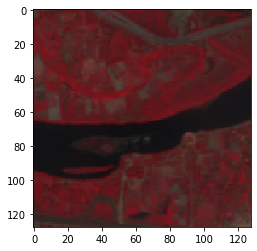

In [ ]:
""" Visualizing Results """

n_image = 415  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

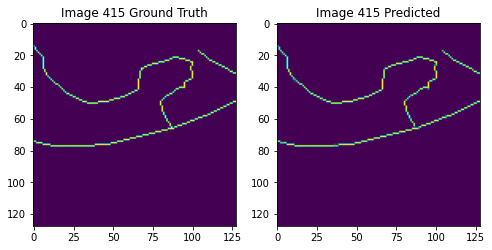

In [ ]:
""" Visualizing Results """

n_image = 415  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='center')
plt.imshow(image_3)
    
plt.show()

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff278157ef0>)

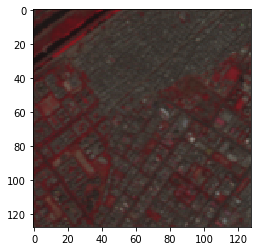

In [ ]:
""" Visualizing Results """

n_image = 527  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

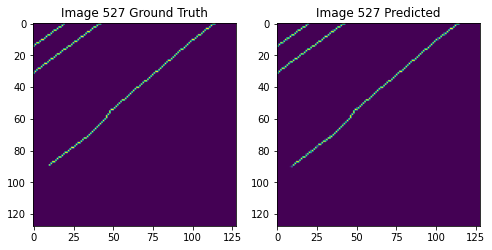

In [ ]:
""" Visualizing Results """

n_image = 527  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='center')
plt.imshow(image_3)
    
plt.show()

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff0bffd59b0>)

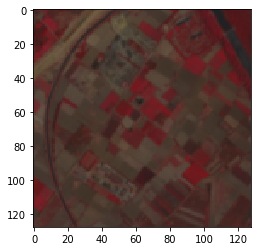

In [ ]:
""" Visualizing Results """

n_image = 2056  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

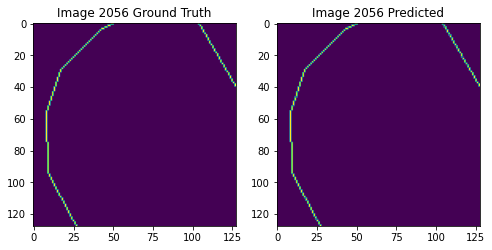

In [ ]:
""" Visualizing Results """

n_image = 2056  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='center')
plt.imshow(image_3)
    
plt.show()

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff0bfed9320>)

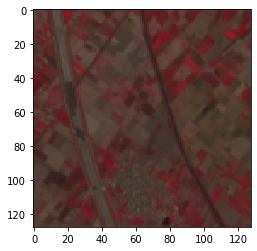

In [ ]:
""" Visualizing Results """

n_image = 2061  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

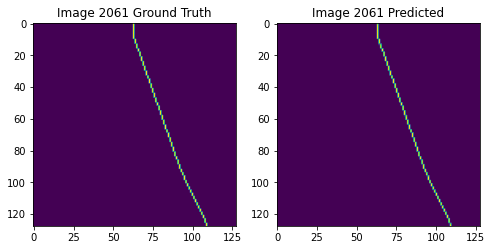

In [ ]:
""" Visualizing Results """

n_image = 2061  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='center')
plt.imshow(image_3)
    
plt.show()

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff0bfdebe10>)

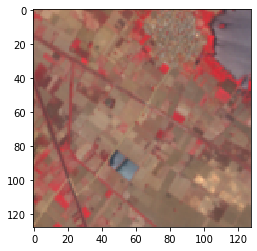

In [ ]:
""" Visualizing Results """

n_image = 2089  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

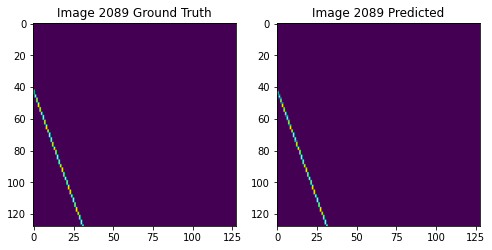

In [ ]:
""" Visualizing Results """

n_image = 2089  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='center')
plt.imshow(image_3)
    
plt.show()

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff0bfc9f080>)

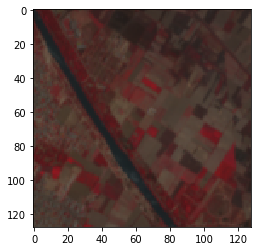

In [ ]:
""" Visualizing Results """

n_image = 2112  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

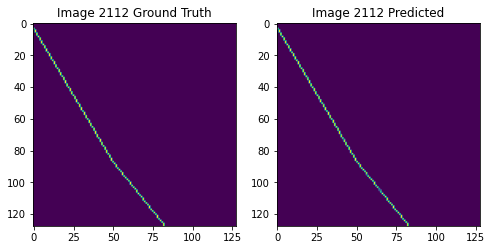

In [ ]:
""" Visualizing Results """

n_image = 2112  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='center')
plt.imshow(image_3)
    
plt.show()

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff0bfbbd2b0>)

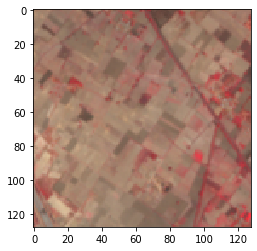

In [ ]:
""" Visualizing Results """

n_image = 2120  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

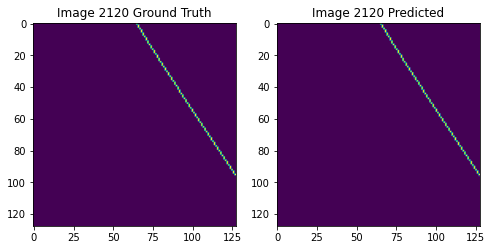

In [ ]:
""" Visualizing Results """

n_image = 2120  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='center')
plt.imshow(image_3)
    
plt.show()

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff0bfa584e0>)

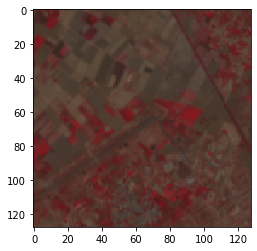

In [ ]:
""" Visualizing Results """

n_image = 2128  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

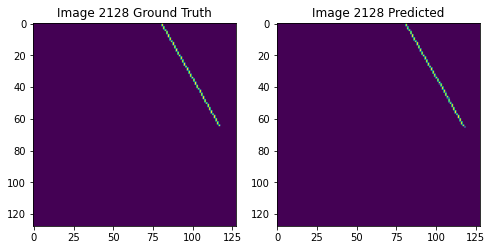

In [ ]:
""" Visualizing Results """

n_image = 2128  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='center')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='center')
plt.imshow(image_3)
    
plt.show()

((128, 128),
 <matplotlib.image.AxesImage at 0x7ff0bf975710>)

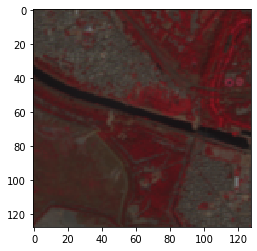

In [ ]:
""" Visualizing Results """

n_image = 534  # Image Number

# Input Image
tifffile.imshow(data_FCC[n_image],figure=(128,128))

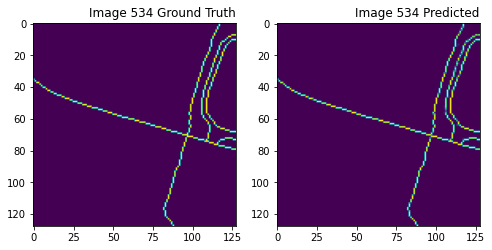

In [ ]:
""" Visualizing Results """

n_image = 534  # Image Number

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1

# Ground Truth
image_2 = data_GT[n_image][:,:,0]
fig.add_subplot(rows, columns, 1)
plt.title("Image {} Ground Truth".format(n_image),loc='right')
plt.imshow(image_2)

# Predicted output
image_3 = GT_predict[n_image][:,:,0]
fig.add_subplot(rows, columns, 2)
plt.title("Image {} Predicted".format(n_image),loc='right')
plt.imshow(image_3)
    
plt.show()